In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#results = pd.read_csv('./../../../data_source/results/baseline_nofilter_40vals_10reps_dfs.csv', index_col=0)
results = pd.read_csv(
    './../../../data_source/results/with_pet_outliers_60evals_40reps_univariate_nofilter_dfs.csv', 
    index_col=0
)
results.head()

,exp_id,experiment_id,test_score,train_score,test_score_variance,train_score_variance,feature_votes,exp_duration
0,684,StudentTTestSelection_PLSREstimator,0.516667,0.515638,0.001876,0.000057,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN
1,559,StudentTTestSelection_PLSREstimator,0.524084,0.518209,0.002105,0.000188,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN
2,629,StudentTTestSelection_PLSREstimator,0.525824,0.509543,0.001685,0.000052,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN
3,192,StudentTTestSelection_PLSREstimator,0.515842,0.531246,0.002219,0.000184,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN
4,835,StudentTTestSelection_PLSREstimator,0.525733,0.523382,0.007646,0.000207,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN


In [3]:
results.shape

(2240, 8)

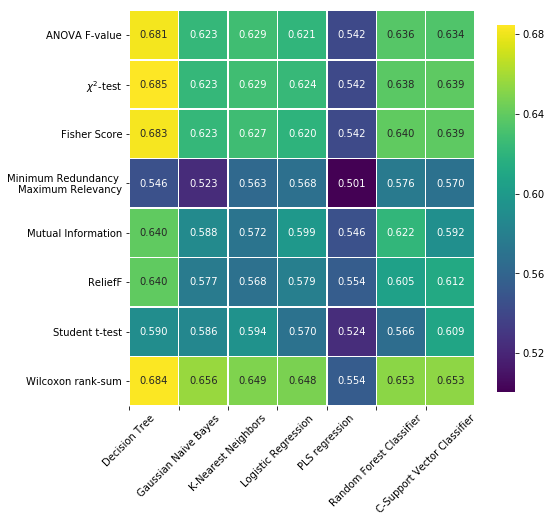

In [4]:
# NIR = 0.677

model_grps = results.groupby('experiment_id')
_avg_scores = model_grps['test_score'].mean()

_rows, _cols = zip(*list(map(lambda label: label.split('_'), _avg_scores.index)))
rows = np.unique(_rows)
cols = np.unique(_cols)

avg_scores = model_grps['test_score'].mean().values.reshape(np.size(rows), np.size(cols))

model_names = [
    'Decision Tree', 'Gaussian Naive Bayes',
    'K-Nearest Neighbors', 'Logistic Regression',
    'PLS regression', 'Random Forest Classifier',
    'C-Support Vector Classifier'
]
selector_names = [
    'ANOVA F-value', r'$\chi^2$-test', 'Fisher Score',
    'Minimum Redundancy \nMaximum Relevancy', 'Mutual Information', 
    'ReliefF', 'Student t-test','Wilcoxon rank-sum'
]

plt.figure(figsize=(8, 8))
sns.heatmap(
    avg_scores,
    yticklabels=selector_names,  
    xticklabels=model_names,
    vmin=np.nanmin(avg_scores) - 1e-4, 
    vmax=np.nanmax(avg_scores) + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.3f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.8},  
)
# Layout:
# Include var/std/CI in tuple
plt.xticks(np.arange(7), rotation=45)
plt.tight_layout()
plt.savefig(
    #'./../../../figures/baseline_nofilter_40vals_10reps_dfs.png',
    './../../../figures/with_pet_outliers_60evals_40reps_univariate_sffs_nofilter_dfs.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [ ]:
# TODO:
# * Check convergence hparam search.